# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

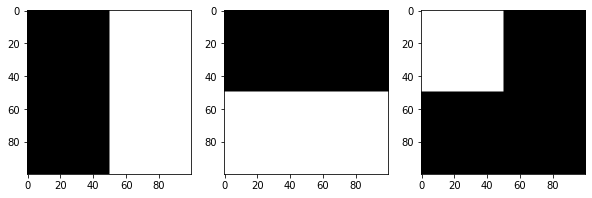

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


In [3]:
# solution

img1 = np.zeros((100, 100))  # This creates a 100x100 grid filled with zeros. Zeros = black pixels.
img1[:, 50:] = 255           # For ALL rows (:), change columns 50 to the end (50:) to 255." 255 = white.

img2 = np.zeros((100, 100))  # Start with all black
img2[50:, :] = 255   # :50 = start to 50 (top rows)

img3 = np.zeros((100,100))
img3[:50, :50] = 255



*   Use the above three images to create the following image

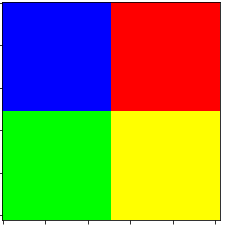
*Hint: Remember channels and color spaces*

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

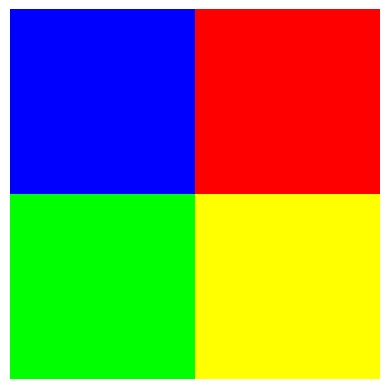

In [4]:
# solution

rgb = np.stack([img1, img2,img3], axis=2)
plt.imshow(rgb.astype(np.uint8))
plt.axis("off")


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

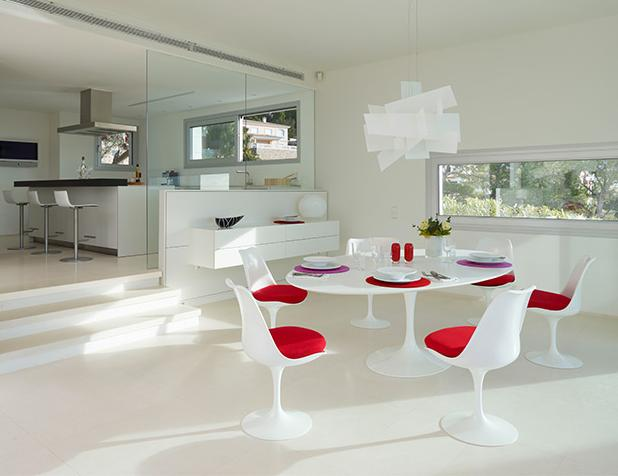

*   Extract individual channels and plot them using matplotlib subplot.



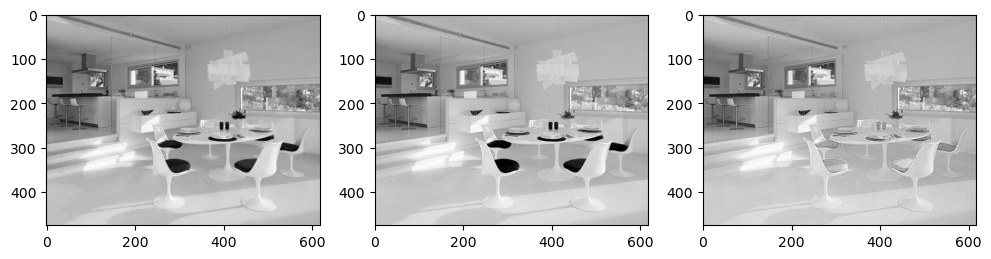

In [5]:
# solution

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/sillas.jpg')

channel_0 = img[:, :, 0]  # Blue
channel_1 = img[:, :, 1]  # Green
channel_2 = img[:, :, 2]  # Red

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(channel_0, cmap='gray')
axes[1].imshow(channel_1, cmap='gray')
axes[2].imshow(channel_2, cmap='gray')
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

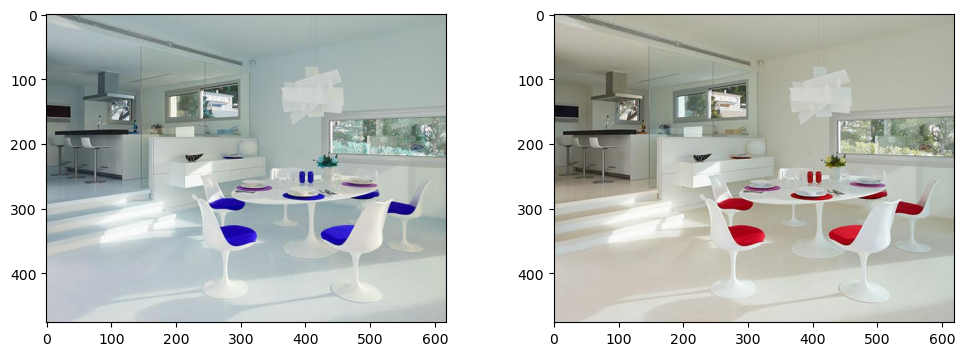

In [6]:
# solution

img_copy = cv2.imread('images/sillas.jpg')
temp = img_copy[:, :, 2].copy()  # save Red
img_copy[:, :, 2] = img_copy[:, :, 0]  # put Blue into Red slot
img_copy[:, :, 0] = temp  # put saved Red into Blue slot

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(img)
axes[1].imshow(img_copy)
plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

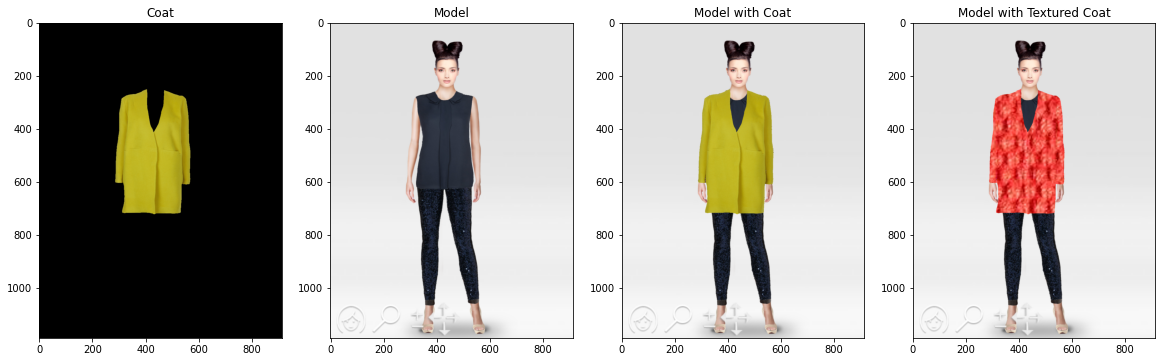

(1188, 915, 3)


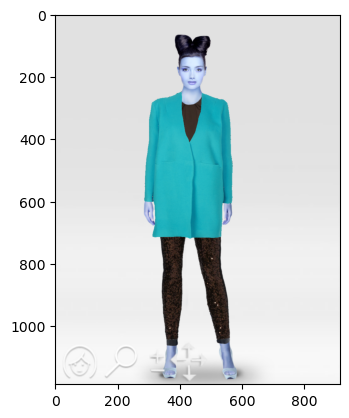

In [7]:
# solution
coat = cv2.imread('images/coat.png')
model = cv2.imread('images/model.png')

print(coat.shape)

mask = coat > 0

model_with_coat = np.where(mask, coat, model)
plt.imshow(model_with_coat)

(1188, 915, 3)
(1188, 915, 3)


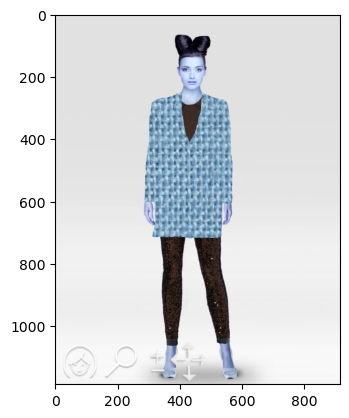

In [8]:
# solution
coat = cv2.imread('images/coat.png')
model = cv2.imread('images/model.png')
texture = cv2.imread('images/texture3.jpg')
texture = cv2.resize(texture, (915, 1188))


print(coat.shape)
print(texture.shape)

mask = coat > 0

model_with_texture = np.where(coat, texture, model)
plt.imshow(model_with_texture)



# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




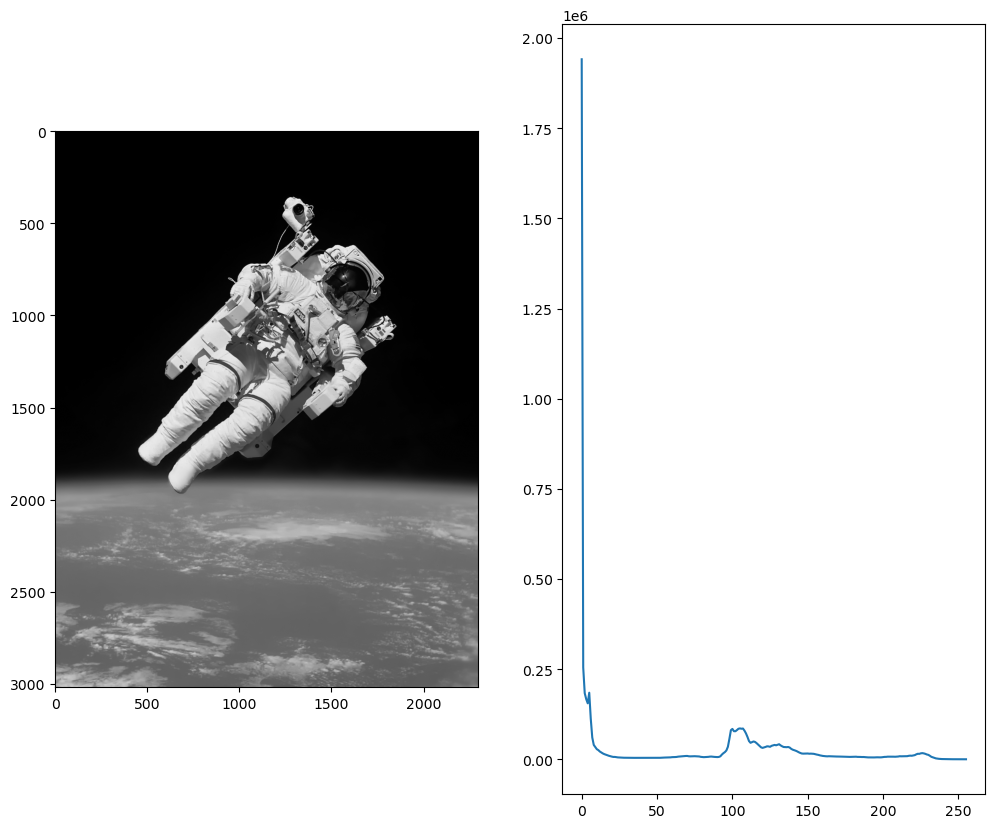

In [18]:
# solution

from skimage.exposure import histogram

# read the image 
astro = cv2.imread('images/Astronaut-EVA_edit.jpg')

# convert to greyscsale

astro_grey = cv2.cvtColor(astro, cv2.COLOR_BGR2GRAY)

# compute histogram 

hist_values, bin_centers = histogram(astro_grey)

fig, axes = plt.subplots(1, 2, figsize=(12, 10))
axes[0].imshow(astro_grey, cmap='gray')
axes[1].plot(bin_centers, hist_values)
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

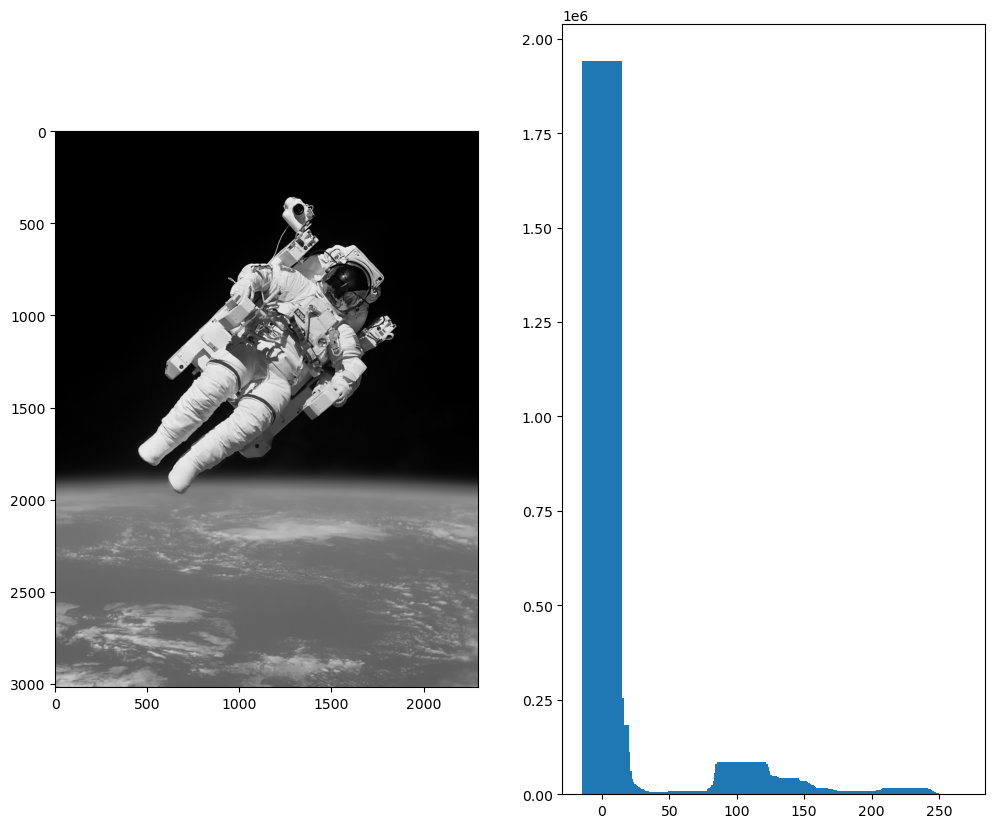

In [22]:
# solution
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
hist_values, bin_centers = histogram(astro_grey, nbins=8)
axes[0].imshow(astro_grey, cmap='gray')
axes[1].bar(bin_centers, hist_values, width=30)
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

When you change the bin count, the histogram's granularity changes:

- **Low bin count (e.g., 8)**: The histogram becomes coarse, grouping many intensity values together. This can hide fine details in the intensity distribution but shows overall trends. Useful for getting a general sense of image brightness distribution.

- **High bin count (e.g., 256)**: The histogram shows fine-grained details of intensity distribution. Each bin represents a narrow range of pixel values, revealing subtle variations but potentially introducing noise in the histogram itself.

**How to define the correct bin count:**
- For 8-bit grayscale images, 256 bins (one per possible value) gives maximum detail
- For analysis purposes, fewer bins (16-64) may be easier to interpret
- The "correct" bin count depends on your goal: visualization, thresholding, or detailed analysis

**Trade-offs:**
- Very low bins → Loss of detail, over-smoothed histogram
- Very high bins → Noisy histogram, harder to see patterns


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


In [ ]:
# solution

# Read the color image
astro_color = cv2.imread('images/Astronaut-EVA_edit.jpg')
astro_color_rgb = cv2.cvtColor(astro_color, cv2.COLOR_BGR2RGB)

# Extract individual channels
blue_channel = astro_color[:, :, 0]
green_channel = astro_color[:, :, 1]
red_channel = astro_color[:, :, 2]

# Compute histograms for each channel
hist_blue, bins_blue = histogram(blue_channel)
hist_green, bins_green = histogram(green_channel)
hist_red, bins_red = histogram(red_channel)

# Compute total histogram (all pixels combined)
hist_total, bins_total = histogram(astro_color.ravel())

# Plot all histograms on a single plot
plt.figure(figsize=(10, 6))
plt.plot(bins_blue, hist_blue, color='blue', label='Blue Channel')
plt.plot(bins_green, hist_green, color='green', label='Green Channel')
plt.plot(bins_red, hist_red, color='red', label='Red Channel')
plt.plot(bins_total, hist_total, color='gray', linestyle='--', label='Total (All Pixels)')

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Color Image - Per Channel and Total')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



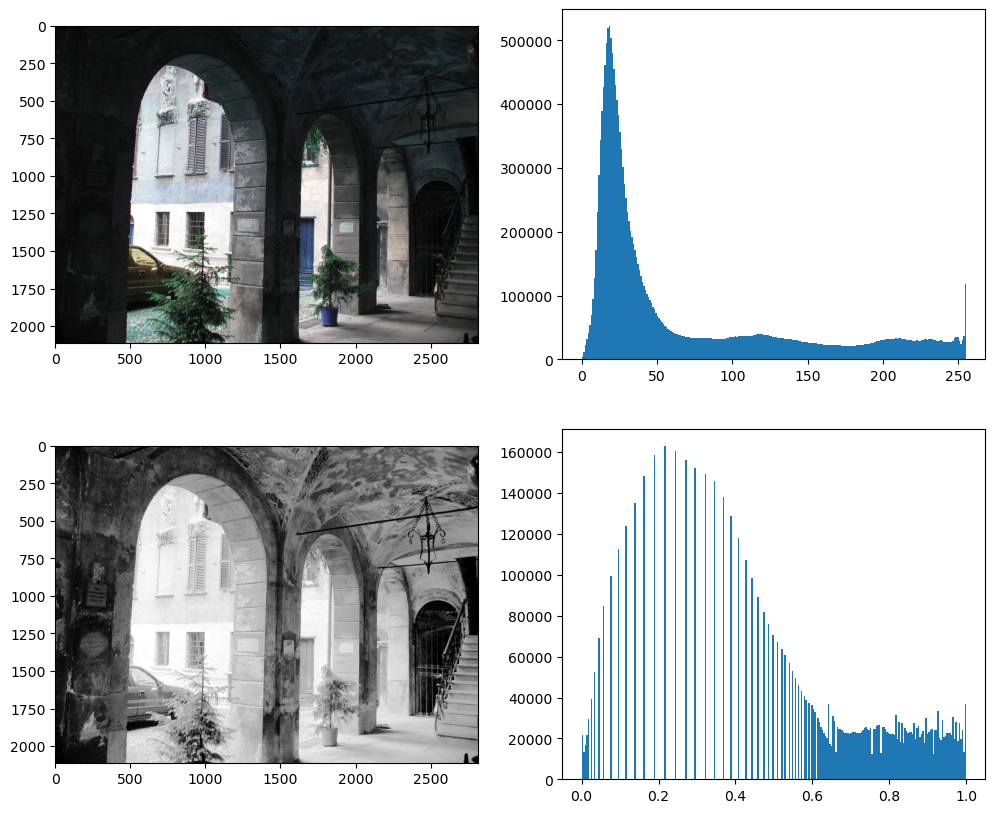

In [ ]:
# solution

from skimage.exposure import equalize_hist


aqua = cv2.imread('images/aquatermi_lowcontrast.jpg')

# convert to grey 

aqua_gray = cv2.cvtColor(aqua, cv2.COLOR_BGR2GRAY)


aqua_eq = equalize_hist(aqua_gray)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(aqua)
axes[0, 1].hist(aqua.ravel(), bins=256)
axes[1, 0].imshow(aqua_eq, cmap='gray')
axes[1, 1].hist(aqua_eq.ravel(), bins=256)
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

**Histogram Equalization (CDF-based):**
- Uses the Cumulative Distribution Function (CDF) to redistribute pixel intensities
- Maps pixels so that the output histogram is approximately uniform (flat)
- Non-linear transformation: the mapping depends on the original histogram shape
- Automatically adapts to the image's actual intensity distribution
- Can significantly boost contrast in regions with many similar pixels

**Linear Contrast Stretch:**
- Uses a simple linear formula: `new = (old - min) / (max - min) * 255`
- Stretches the existing intensity range to fill the full 0-255 range
- Linear transformation: maintains relative brightness relationships
- Only uses min and max values, ignores the overall distribution
- Works well when the image uses a narrow range of intensities

**Key Differences:**
| Aspect | Histogram Equalization | Linear Stretch |
|--------|----------------------|----------------|
| Transformation | Non-linear (CDF-based) | Linear |
| Goal | Uniform histogram | Full range utilization |
| Sensitivity | Considers entire distribution | Only min/max values |
| Effect | Can dramatically change appearance | Preserves relative relationships |

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



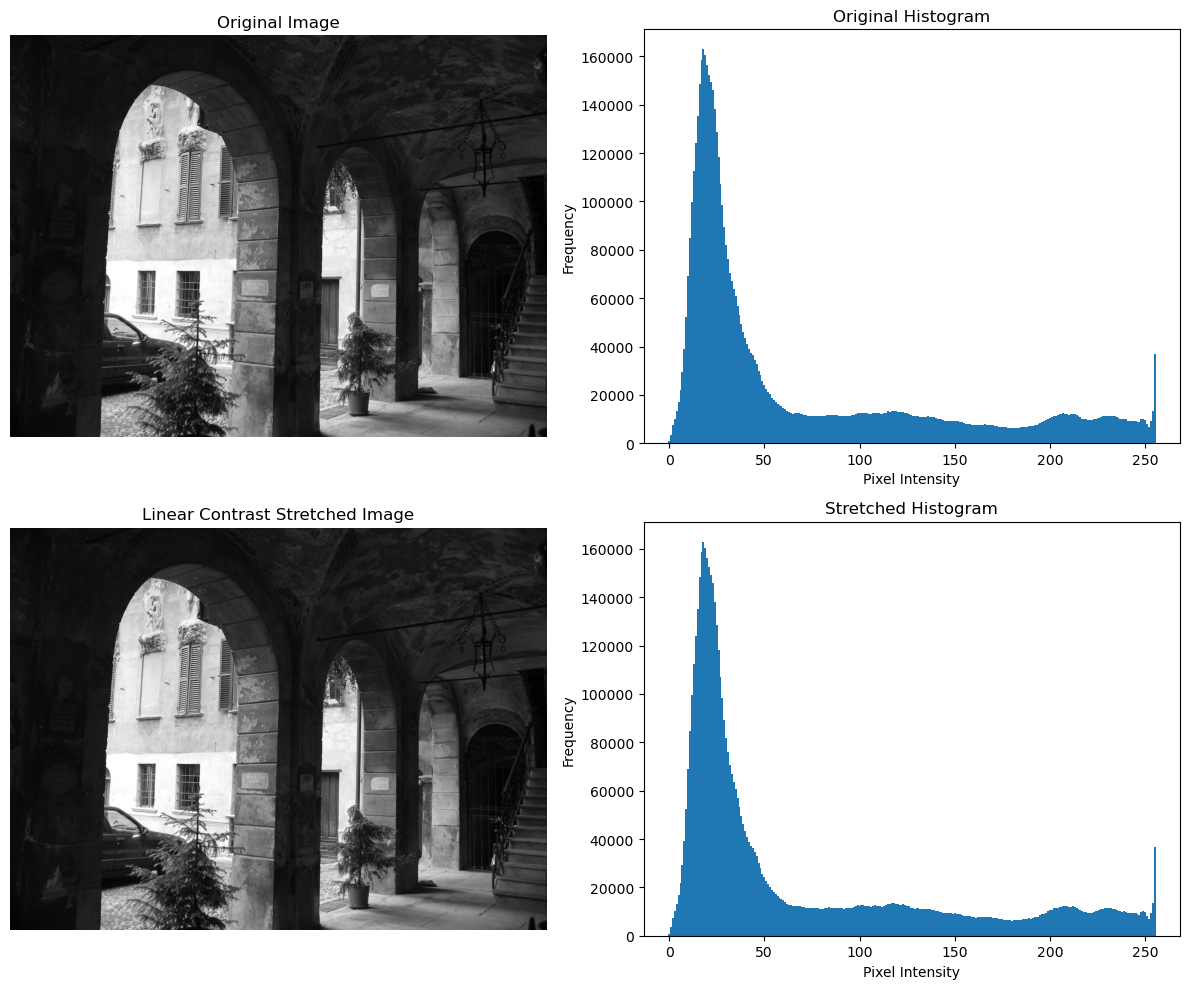

In [24]:
# solution

def linear_contrast_stretch(image, nbins=256):
    """
    Perform linear contrast stretch on a grayscale image.
    
    Parameters:
    - image: grayscale image array
    - nbins: number of bins for histogram (used for visualization reference)
    
    Returns:
    - enhanced: contrast-stretched image array
    """
    # Get min and max pixel values
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Apply linear contrast stretch formula
    # new_pixel = (old_pixel - min) / (max - min) * 255
    if max_val - min_val == 0:
        # Avoid division by zero for constant images
        return image.copy()
    
    enhanced = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    
    return enhanced

# Load and convert image to grayscale
aqua = cv2.imread('images/aquatermi_lowcontrast.jpg')
aqua_gray = cv2.cvtColor(aqua, cv2.COLOR_BGR2GRAY)

# Apply linear contrast stretch
aqua_stretched = linear_contrast_stretch(aqua_gray)

# Create 2x2 visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(aqua_gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Original histogram
hist_orig, bins_orig = histogram(aqua_gray)
axes[0, 1].bar(bins_orig, hist_orig, width=1)
axes[0, 1].set_title('Original Histogram')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Enhanced image
axes[1, 0].imshow(aqua_stretched, cmap='gray')
axes[1, 0].set_title('Linear Contrast Stretched Image')
axes[1, 0].axis('off')

# Enhanced histogram
hist_enh, bins_enh = histogram(aqua_stretched)
axes[1, 1].bar(bins_enh, hist_enh, width=1)
axes[1, 1].set_title('Stretched Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




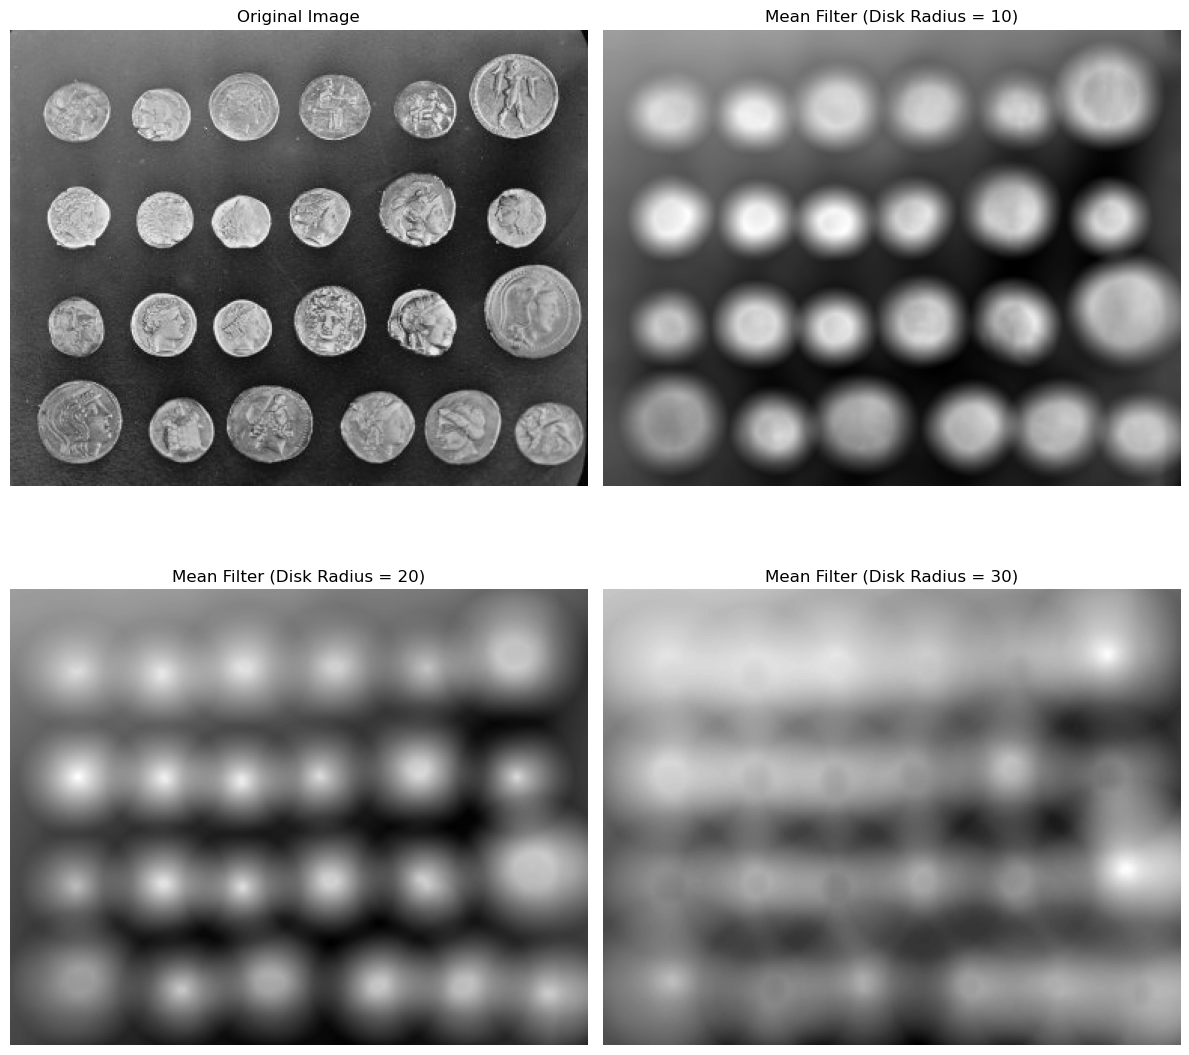

In [25]:
# solution

from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean

# Load coins image from skimage data module
coins = data.coins()

# Define disk structuring elements with different radii
selem_20 = disk(20)  # radius 20
selem_30 = disk(30)  # radius + 10 = 30
selem_10 = disk(10)  # radius - 10 = 10

# Apply mean filter with each selem
coins_mean_20 = mean(coins, selem_20)
coins_mean_30 = mean(coins, selem_30)
coins_mean_10 = mean(coins, selem_10)

# Visualize all images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(coins_mean_10, cmap='gray')
axes[0, 1].set_title('Mean Filter (Disk Radius = 10)')
axes[0, 1].axis('off')

axes[1, 0].imshow(coins_mean_20, cmap='gray')
axes[1, 0].set_title('Mean Filter (Disk Radius = 20)')
axes[1, 0].axis('off')

axes[1, 1].imshow(coins_mean_30, cmap='gray')
axes[1, 1].set_title('Mean Filter (Disk Radius = 30)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_81098/4262458491.py:9: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_square = square(15)
/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_81098/4262458491.py:10: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_rectangle = rectangle(10, 20)


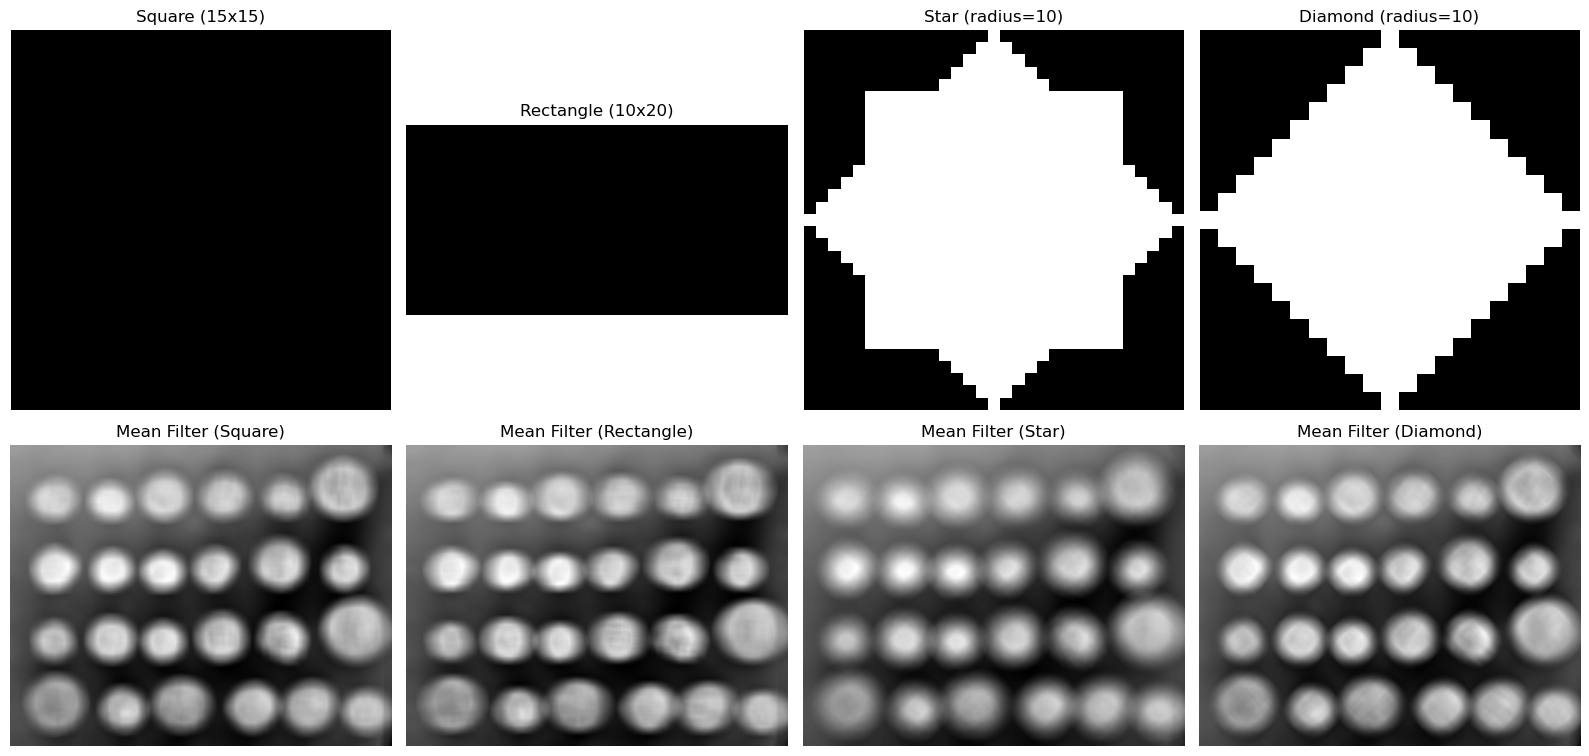

In [26]:
# solution

from skimage.morphology import disk, square, rectangle, star, diamond

# Load coins image
coins = data.coins()

# Define different structuring elements with optimal sizes
selem_square = square(15)
selem_rectangle = rectangle(10, 20)
selem_star = star(10)
selem_diamond = diamond(10)

# Apply mean filter with each selem
coins_square = mean(coins, selem_square)
coins_rectangle = mean(coins, selem_rectangle)
coins_star = mean(coins, selem_star)
coins_diamond = mean(coins, selem_diamond)

# Create 2 x 4 subplot: selems on top, smoothened images on bottom
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Row 1: Structuring elements
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title('Square (15x15)')
axes[0, 0].axis('off')

axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title('Rectangle (10x20)')
axes[0, 1].axis('off')

axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title('Star (radius=10)')
axes[0, 2].axis('off')

axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title('Diamond (radius=10)')
axes[0, 3].axis('off')

# Row 2: Smoothened images
axes[1, 0].imshow(coins_square, cmap='gray')
axes[1, 0].set_title('Mean Filter (Square)')
axes[1, 0].axis('off')

axes[1, 1].imshow(coins_rectangle, cmap='gray')
axes[1, 1].set_title('Mean Filter (Rectangle)')
axes[1, 1].axis('off')

axes[1, 2].imshow(coins_star, cmap='gray')
axes[1, 2].set_title('Mean Filter (Star)')
axes[1, 2].axis('off')

axes[1, 3].imshow(coins_diamond, cmap='gray')
axes[1, 3].set_title('Mean Filter (Diamond)')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Changing the radius of the disk structuring element directly affects the smoothing:

**Smaller radius (e.g., 10):**
- Fewer neighboring pixels contribute to each output pixel
- Less smoothing/blurring effect
- Fine details and edges are better preserved
- Noise reduction is minimal

**Larger radius (e.g., 30):**
- More neighboring pixels are averaged together
- Stronger smoothing/blurring effect
- Fine details and edges become more blurred
- Better noise reduction but at the cost of detail

**Trade-off:**
- Small radius = preserve details but less noise reduction
- Large radius = strong smoothing but loss of detail

The optimal radius depends on the application: use smaller radii when preserving edges is important, and larger radii when significant noise reduction is needed.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Different structuring elements produce distinct smoothing behaviors based on their shape:

**Disk:**
- Circular neighborhood, isotropic (same in all directions)
- Produces uniform smoothing without directional bias
- Best for general-purpose smoothing

**Square:**
- Includes corner pixels that are farther from the center
- Can introduce slight diagonal artifacts
- Smoothing is slightly stronger along diagonals

**Rectangle:**
- Non-isotropic smoothing (different in horizontal vs vertical directions)
- Smooths more in the direction of the longer side
- Useful when you want directional smoothing (e.g., horizontal noise patterns)

**Diamond:**
- Similar to disk but with 45° rotated corners
- Smoothing is more uniform than square but less than disk
- Computationally efficient while approximating circular behavior

**Star:**
- Has gaps in the smoothing kernel
- Produces a more textured/less uniform smoothing effect
- Can preserve some edge information while still smoothing

**Key Observation:** Isotropic shapes (disk, diamond) produce more natural-looking smoothing, while rectangular shapes introduce directional bias that may be useful or undesirable depending on the application.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

**Difference between Mean Filter and Gaussian Filter:**

| Aspect | Mean Filter | Gaussian Filter |
|--------|-------------|-----------------|
| Weights | All pixels weighted equally | Center pixels weighted more heavily |
| Kernel | Flat/uniform (all 1s) | Bell-shaped (Gaussian distribution) |
| Edge preservation | Poor - blurs edges significantly | Better - preserves edges more |
| Noise reduction | Good for uniform noise | Better for Gaussian noise |
| Artifacts | Can create blocky artifacts | Smoother, more natural results |

**When to use Mean Filter:**
- Simple, fast smoothing where edge preservation isn't critical
- Salt-and-pepper noise (though median filter is often better)
- Preprocessing for morphological operations
- When computational efficiency is a priority

**When to use Gaussian Filter:**
- When edge preservation is important
- Pre-processing before edge detection (e.g., Canny)
- Natural image smoothing that looks more realistic
- When dealing with Gaussian noise
- Scale-space operations in computer vision

**Key Insight:** Gaussian filters are generally preferred in most applications because they produce more natural-looking results and better preserve important image features. Mean filters are simpler and faster but tend to blur edges more aggressively.